In [1]:
from wavtools import *
from imtools import *
import scipy.io.wavfile as wv #librairie pour lire des fichiers .wav et les transformer en fichiers numpy
import numpy as np
import matplotlib.pylab as plt
from numpy.fft import *
import numpy.fft as fft
#MODIFICATIOOOOOOOON!!!!!!!!!!!!!!!!#

# Transformée de Fourier discrète et FFT

## Son sinusoïdal

In [2]:
f0=440
Fe=8800
N=3*Fe
temps=np.linspace(0.0, 3.0, num=N)
signal=plt.sin(2*np.pi*f0*temps)

save_wave(signal, 'son1.wav', 8800)

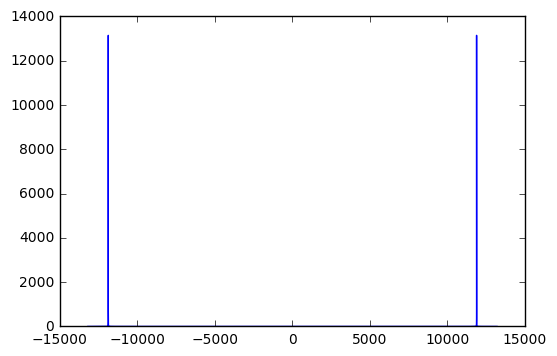

In [3]:
N=3*8800
mode=np.linspace(-(N/2), N/2, num = N)
plt.plot(mode, np.abs(np.fft.fft(signal)))

On a $\tilde v$ le signal continu et v le signel échantillonné.
$\tilde v = sin (440*2 \pi * t)$ avec $t \in \mathbb{R} $ donc $v=sin (440*2\pi * n)$ avec $n \in [0..D] $ avec $N$ points. 

Pour $\tilde \omega$ on a $\tilde \omega ^{k} = e^{-2ik\pi * t}$

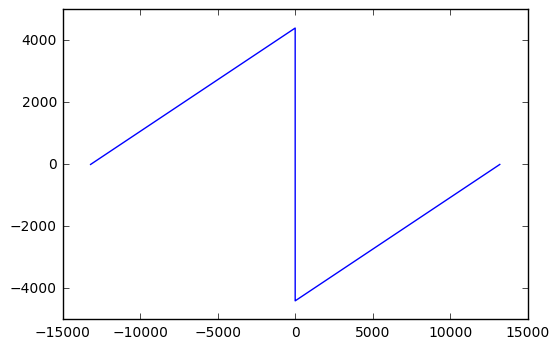

In [4]:
plt.plot(mode,np.fft.fftfreq(N, 1/8800))

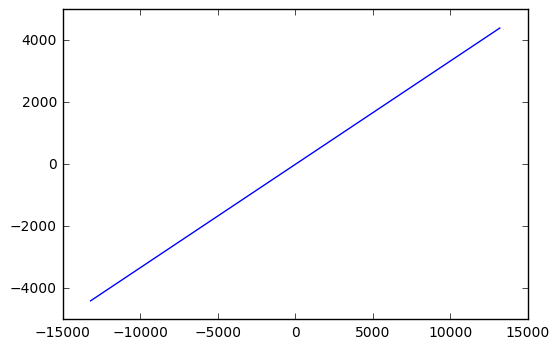

In [5]:
plt.plot(mode, np.fft.fftshift(np.fft.fftfreq(N, 1/8800)))
#print(np.fft.fftshift(np.fft.fftfreq(N, 1/8800)))

fft.shift permet d'ordonner les coefficients de la transformée de Fourier. C'est beaucoup plus facile de visualiser lorsque l'origine des fréquences au centre.

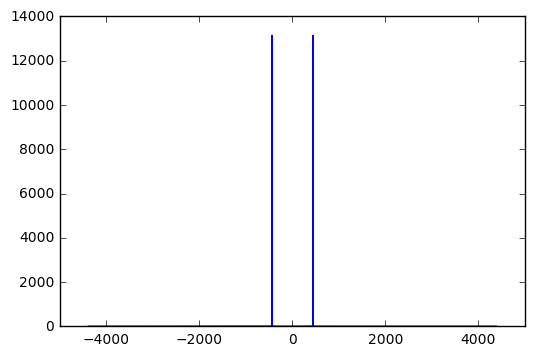

In [6]:
plt.plot(np.fft.fftfreq(N, 1/8800),abs(np.fft.fft(signal)))

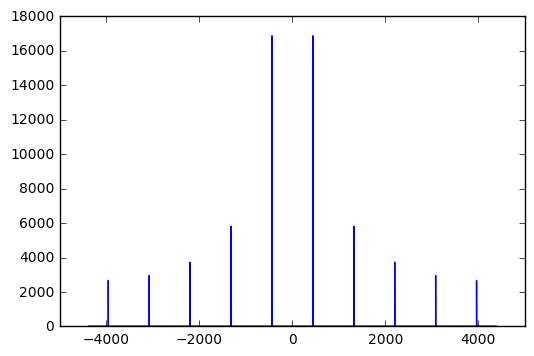

In [7]:
f0=440
Fe=8800
N=3*Fe
temps=np.linspace(0.0, 3.0, num=N)
Scarre=plt.sign(plt.sin(2*np.pi*f0*temps))
plt.plot(np.fft.fftfreq(N, 1/8800),abs(np.fft.fft(Scarre)))


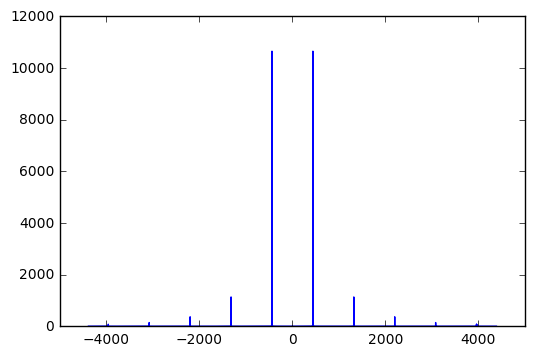

In [8]:
f0=440
Fe=8800
N=3*Fe
temps=np.linspace(0.0, 3.0, num=N)
Striangle=(2/np.pi)*np.arcsin(plt.sin(2*np.pi*f0*temps))
plt.plot(np.fft.fftfreq(N, 1/8800),abs(np.fft.fft(Striangle)))

Décription

## Deux sons sinusoïdaux

In [9]:
Fe=8800
N=Fe

f1=440
temps=np.linspace(0.0, 1.0, num=N)
signal1=plt.sin(2*np.pi*f1*temps)

f2=600
temps=np.linspace(0.0, 1.0, num=N)
signal2=plt.sin(2*np.pi*f2*temps)

signal=np.concatenate((signal1, signal2))

save_wave(signal, 'son2.wav', 8800)

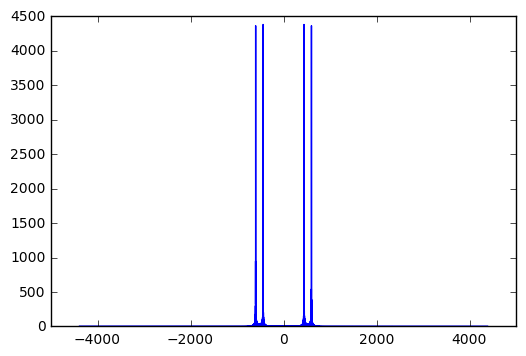

In [10]:
plt.plot(np.fft.fftfreq(2*N, 1/Fe),abs(np.fft.fft(signal)))

Decription

## Identifier des notes de musique

C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(0, 1000)

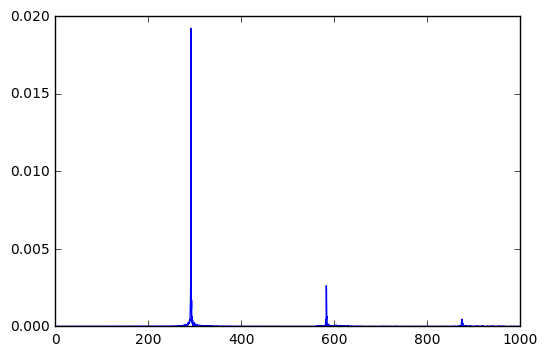

In [11]:
plt.ion()
plt.close('all')
#plt.figure(1)

Fefl,sfl=wv.read('flute.wav')
Feba, sba=wv.read('basson.wav')
Feco, sco=wv.read('compose.wav')

#Pour la flute
Tfl=len(sfl)*(1./Fefl)
lam=1./Tfl
N=len(sfl)
f=lam*np.arange(N/2);
w=fft.fft(sfl)/len(sfl)
plt.clf()
plt.plot(f,np.abs(w)[0:N/2]/len(sfl))
plt.draw()
plt.xlim(0, 1000)

C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(0, 1200)

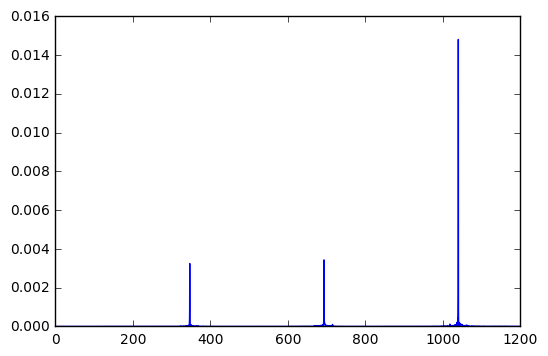

In [12]:
#Pour le basson
Tba=len(sba)*(1./Feba)
lam=1./Tba
N=len(sba)
f=lam*np.arange(N/2);
w=fft.fft(sba)/len(sba)
plt.clf()
plt.plot(f,np.abs(w)[0:N/2]/len(sba))
plt.draw()
plt.xlim(0, 1200)

C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(0, 2500)

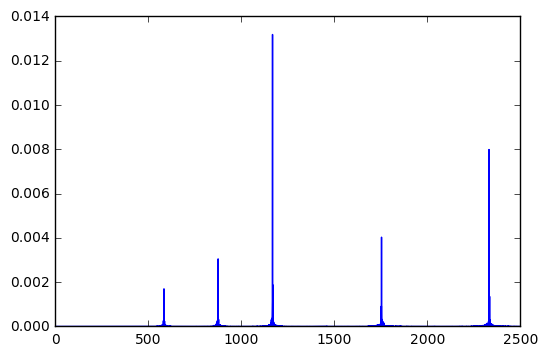

In [13]:
#Pour compose
Tco=len(sco)*(1./Feco)
lam=1./Tco
N=len(sco)
f=lam*np.arange(N/2);
w=fft.fft(sco)/len(sco)
plt.clf()
plt.plot(f,np.abs(w)[0:N/2]/len(sco))
plt.draw()
plt.xlim(0, 2500)

## Effet du fenêtrage

Pour T=1s

In [14]:
T=1

(0, 50)

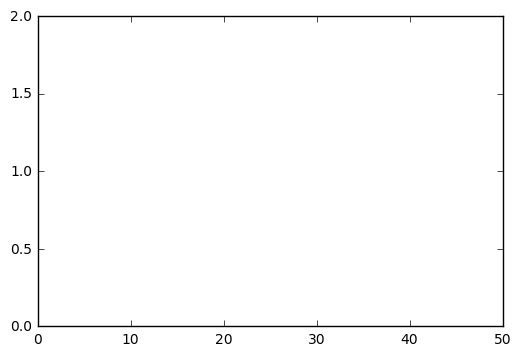

In [15]:
k=1
Fe=2**k
N=T*Fe
temps=np.linspace(0.0, T, num=N)
signal=plt.exp(2*np.pi*complex(0,1)*temps)

plt.plot(np.fft.fftfreq(np.int(N), 1/Fe),abs(np.fft.fft(np.real(signal))))
plt.xlim(0, 50)

(0, 50)

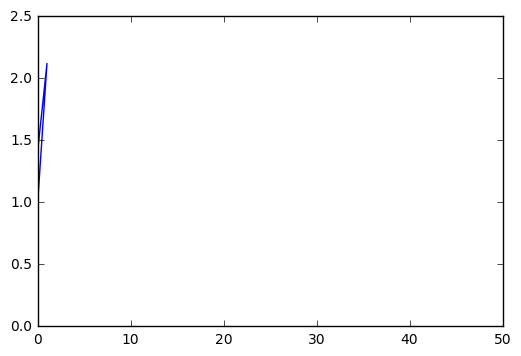

In [16]:
k=2
Fe=2**k
N=T*Fe
temps=np.linspace(0.0, T, num=N)
signal=plt.exp(2*np.pi*complex(0,1)*temps)

plt.plot(np.fft.fftfreq(np.int(N), 1/Fe),abs(np.fft.fft(np.real(signal))))
plt.xlim(0, 50)

(0, 50)

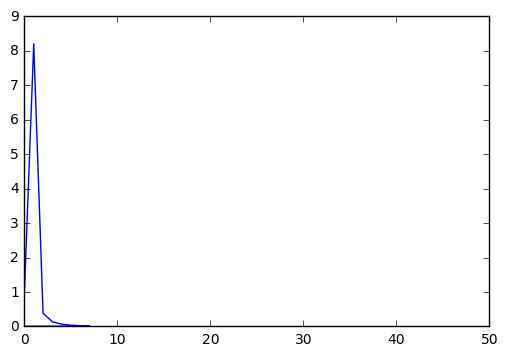

In [17]:
k=4
Fe=2**k
N=T*Fe
temps=np.linspace(0.0, T, num=N)
signal=plt.exp(2*np.pi*complex(0,1)*temps)

plt.plot(np.fft.fftfreq(np.int(N), 1/Fe),abs(np.fft.fft(np.real(signal))))
plt.xlim(0, 50)

(0, 50)

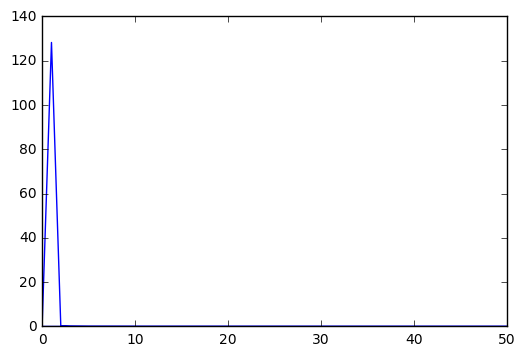

In [18]:
k=8
Fe=2**k
N=T*Fe
temps=np.linspace(0.0, T, num=N)
signal=plt.exp(2*np.pi*complex(0,1)*temps)

plt.plot(np.fft.fftfreq(np.int(N), 1/Fe),abs(np.fft.fft(np.real(signal))))
plt.xlim(0, 50)

Pour T=1/2

In [19]:
T=0.5

(0, 50)

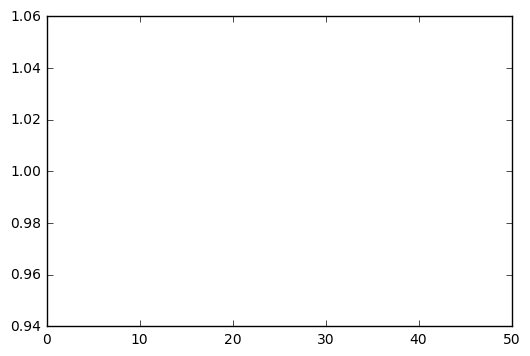

In [20]:
k=1
Fe=2**k
N=T*Fe
temps=np.linspace(0.0, T, num=N)
signal=plt.exp(2*np.pi*complex(0,1)*temps)

plt.plot(np.fft.fftfreq(np.int(N), 1/Fe),abs(np.fft.fft(np.real(signal))))
plt.xlim(0, 50)

(0, 50)

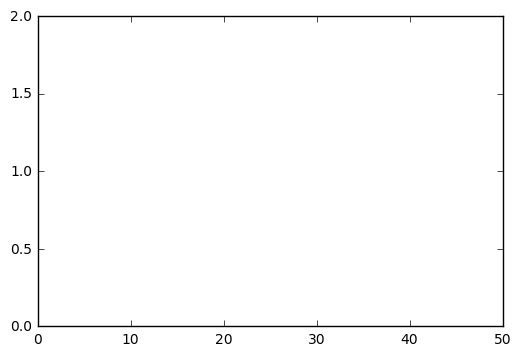

In [21]:
k=2
Fe=2**k
N=T*Fe
temps=np.linspace(0.0, T, num=N)
signal=plt.exp(2*np.pi*complex(0,1)*temps)

plt.plot(np.fft.fftfreq(np.int(N), 1/Fe),abs(np.fft.fft(np.real(signal))))
plt.xlim(0, 50)

(0, 50)

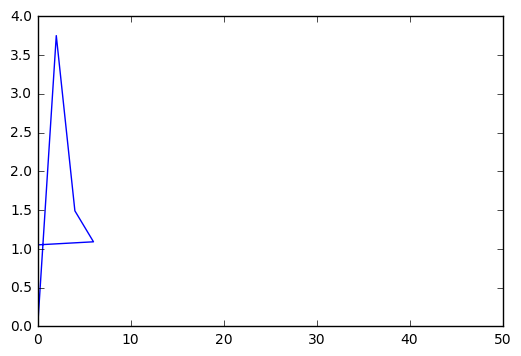

In [22]:
k=4
Fe=2**k
N=T*Fe
temps=np.linspace(0.0, T, num=N)
signal=plt.exp(2*np.pi*complex(0,1)*temps)

plt.plot(np.fft.fftfreq(np.int(N), 1/Fe),abs(np.fft.fft(np.real(signal))))
plt.xlim(0, 50)

(0, 50)

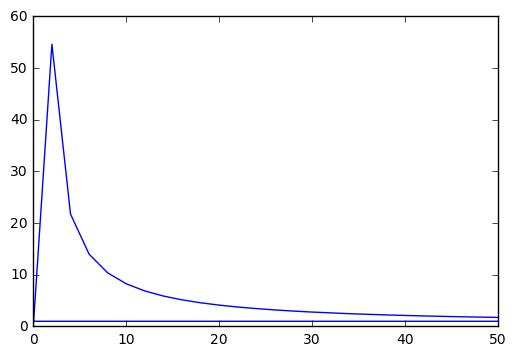

In [23]:
k=8
Fe=2**k
N=T*Fe
temps=np.linspace(0.0, T, num=N)
signal=plt.exp(2*np.pi*complex(0,1)*temps)

plt.plot(np.fft.fftfreq(np.int(N), 1/Fe),abs(np.fft.fft(np.real(signal))))
plt.xlim(0, 50)

## Analyse d'un signal quelconque

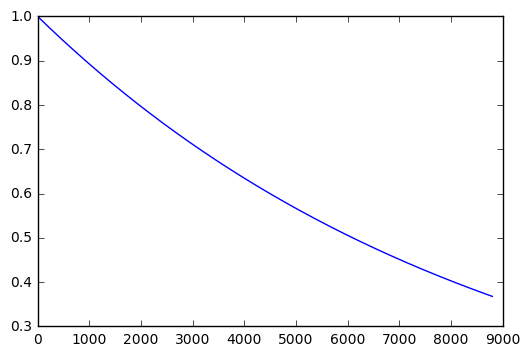

In [24]:
Fe=8800
T=1
N=T*Fe
temps=np.linspace(0.0, T, num=N)
signal=plt.exp(-np.abs(temps))

plt.plot(signal)
#plt.plot(np.fft.fftfreq(np.int(N), 1/Fe),abs(np.fft.fft(np.real(signal))))
#plt.xlim(0, 50)

# Transformée de Fourier à fenêtre

In [54]:
T0=5. #intervalle de travail [0, T]
Fe=4800. #fréquence d'échantillonnage
Te=1./Fe
t=np.arange(0,T0+Te,Te) 
F1=400 #fréquence 1
F2=600 #fréquence 2
N=len(t)-1

dt1=t[1:np.int(2*N/5)+1]
dt2=t[0:np.int(3*N/5)]
 
s1=np.cos(2*np.pi*F1*dt1)
s2=np.cos(2*np.pi*F2*dt2)

s=np.hstack((s1, s2)) 

ffts=fft.fft(s)

C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


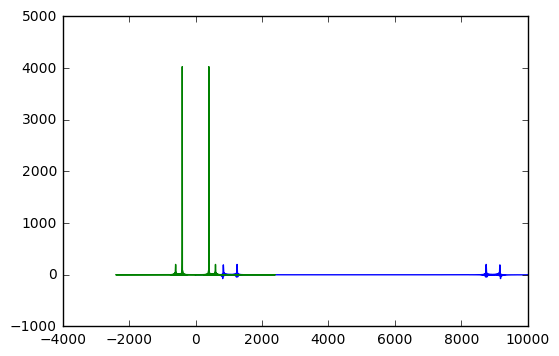

In [64]:
s2=s[0:np.int(10000)]
ffts2=fft.fft(s2)
plt.plot(ffts2)
plt.plot(np.fft.fftfreq(np.int(10000), 1/Fe),abs(np.fft.fft(np.real(s2))))
#plt.xlim(-650, 650)

C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


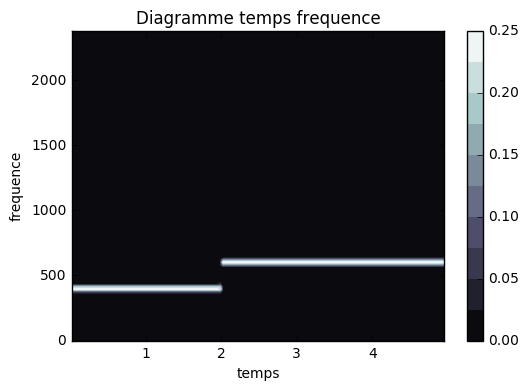

In [67]:
#Paramètres de la transformée de Fourier à fenêtre
p=2**7 #largeur de fenêtre
n=p/2 #recouvrement temporel
T=2.*p/Fe #Largeur temporelle de la fenêtre
F=np.arange(p)/T #Vecteur des fréquences observées
t=[] #vecteur des temps
S=np.zeros(p) #matrice des coefficients de Fourier
w=np.hanning(2*p) #déclaration de la fenêtre: fenetre de Hanning
#w=np.hamming(2*p) #

#Calcul du spectrogramme
for k in np.arange(p+1,N-p+1,n+p):
    t=np.hstack((t,[k/Fe])) #construction du vecteur temps
    xw=w*s[k-p:k+p] #produit de la fenetre avec le signal
    yw=fft.fft(xw)/len(xw) # transformée de Fourier
    S=np.vstack((S,np.abs(yw[:p])))

X,Y=np.meshgrid(t,F)      
Z=S[1:,]


CS=plt.contourf(X,Y,Z.T,10,cmap=plt.cm.bone)
cbar=plt.colorbar(CS)

plt.xlabel('temps')
plt.ylabel('frequence')
plt.title('Diagramme temps frequence')
plt.show()



## Fréquences Instantanées

C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


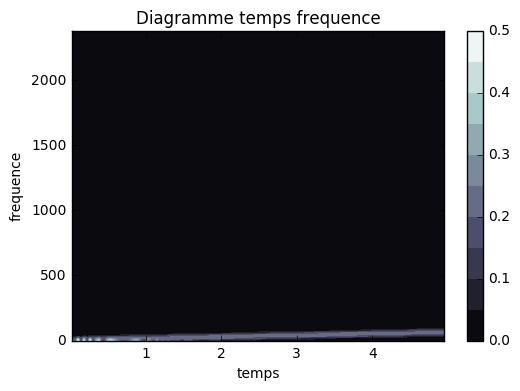

In [76]:
#Chirps Linéaires
T0=5. #intervalle de travail [0, T]
Fe=4800. #fréquence d'échantillonnage
Te=1./Fe
t=np.arange(0,T0+Te,Te) 
F1=4 #fréquence 1
F2=6 #fréquence 2
N=len(t)-1

dt=t[0:N]
s=np.cos(2*np.pi*(F1+F2*dt)*dt)

#Paramètres de la transformée de Fourier à fenêtre
p=2**7 #largeur de fenêtre
n=p/2 #recouvrement temporel
T=2.*p/Fe #Largeur temporelle de la fenêtre
F=np.arange(p)/T #Vecteur des fréquences observées
t=[] #vecteur des temps
S=np.zeros(p) #matrice des coefficients de Fourier
w=np.hanning(2*p) #déclaration de la fenêtre: fenetre de Hanning
#w=np.hamming(2*p) #

#Calcul du spectrogramme
for k in np.arange(p+1,N-p+1,n+p):
    t=np.hstack((t,[k/Fe])) #construction du vecteur temps
    xw=w*s[k-p:k+p] #produit de la fenetre avec le signal
    yw=fft.fft(xw)/len(xw) # transformée de Fourier
    S=np.vstack((S,np.abs(yw[:p])))

X,Y=np.meshgrid(t,F)      
Z=S[1:,]


CS=plt.contourf(X,Y,Z.T,10,cmap=plt.cm.bone)
cbar=plt.colorbar(CS)

plt.xlabel('temps')
plt.ylabel('frequence')
plt.title('Diagramme temps frequence')
plt.show()


C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


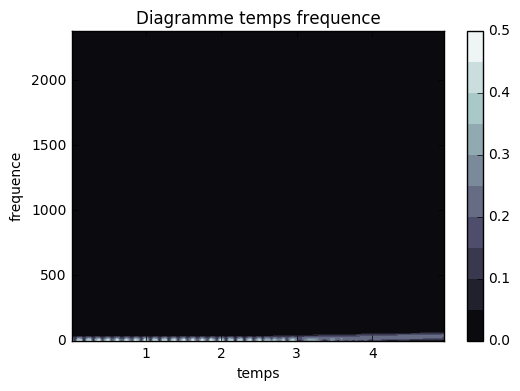

In [79]:
#Chirps Linéaires
T0=5. #intervalle de travail [0, T]
Fe=4800. #fréquence d'échantillonnage
Te=1./Fe
t=np.arange(0,T0+Te,Te) 
F1=4 #fréquence 1
F2=6 #fréquence 2
N=len(t)-1

dt1=t[1:N/2+1]
dt2=t[0:N/2]
s1=np.cos(2*np.pi*F1*dt1)
s2=np.cos(2*np.pi*(F1+F2*dt2)*dt2)
s=np.hstack((s1, s2)) 

#Paramètres de la transformée de Fourier à fenêtre
p=2**7 #largeur de fenêtre
n=p/2 #recouvrement temporel
T=2.*p/Fe #Largeur temporelle de la fenêtre
F=np.arange(p)/T #Vecteur des fréquences observées
t=[] #vecteur des temps
S=np.zeros(p) #matrice des coefficients de Fourier
w=np.hanning(2*p) #déclaration de la fenêtre: fenetre de Hanning
#w=np.hamming(2*p) #

#Calcul du spectrogramme
for k in np.arange(p+1,N-p+1,n+p):
    t=np.hstack((t,[k/Fe])) #construction du vecteur temps
    xw=w*s[k-p:k+p] #produit de la fenetre avec le signal
    yw=fft.fft(xw)/len(xw) # transformée de Fourier
    S=np.vstack((S,np.abs(yw[:p])))

X,Y=np.meshgrid(t,F)      
Z=S[1:,]


CS=plt.contourf(X,Y,Z.T,10,cmap=plt.cm.bone)
cbar=plt.colorbar(CS)

plt.xlabel('temps')
plt.ylabel('frequence')
plt.title('Diagramme temps frequence')
plt.show()

C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


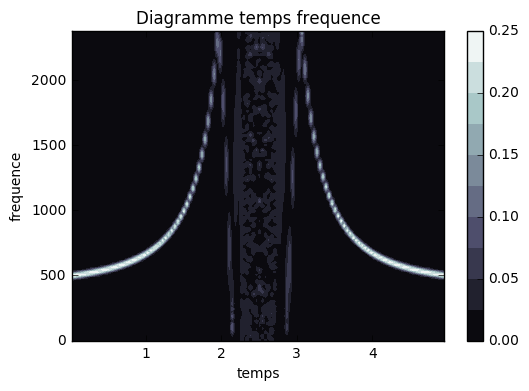

In [82]:
T0=5. #intervalle de travail [0, T]
Fe=4800. #fréquence d'échantillonnage
Te=1./Fe
t=np.arange(0,T0+Te,Te) 
F1=400 #fréquence 1
F2=600 #fréquence 2
N=len(t)-1
#Exercice 1 et Exercice 2, question 1 à 4.
#Construction d'une suite de deux signaux
dt=t[0:N]

#Signal sinusoidal suivi d'un chirp hyperbolique
s=np.cos(2*np.pi*(F1*dt+F2*(2.51-dt)**(-1))) 

#Paramètres de la transformée de Fourier à fenêtre
p=2**7 #largeur de fenêtre
n=p/2 #recouvrement temporel
T=2.*p/Fe #Largeur temporelle de la fenêtre
F=np.arange(p)/T #Vecteur des fréquences observées
t=[] #vecteur des temps
S=np.zeros(p) #matrice des coefficients de Fourier
w=np.hanning(2*p) #déclaration de la fenêtre: fenetre de Hanning
#w=np.hamming(2*p) #

#Calcul du spectrogramme
for k in np.arange(p+1,N-p+1,n+p):
    t=np.hstack((t,[k/Fe])) #construction du vecteur temps
    xw=w*s[k-p:k+p] #produit de la fenetre avec le signal
    yw=fft.fft(xw)/len(xw) # transformée de Fourier
    S=np.vstack((S,np.abs(yw[:p])))

X,Y=np.meshgrid(t,F)      
Z=S[1:,]


CS=plt.contourf(X,Y,Z.T,10,cmap=plt.cm.bone)
cbar=plt.colorbar(CS)

plt.xlabel('temps')
plt.ylabel('frequence')
plt.title('Diagramme temps frequence')
plt.show()


C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\ipykernel\__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


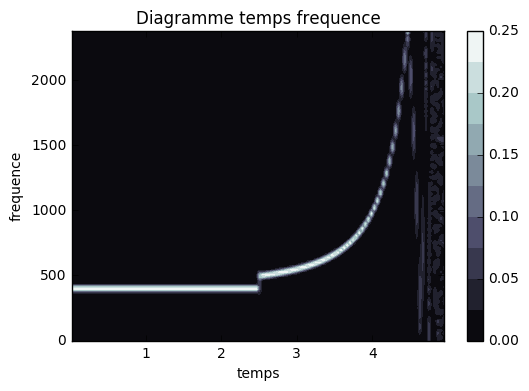

In [81]:
T0=5. #intervalle de travail [0, T]
Fe=4800. #fréquence d'échantillonnage
Te=1./Fe
t=np.arange(0,T0+Te,Te) 
F1=400 #fréquence 1
F2=600 #fréquence 2
N=len(t)-1
#Exercice 1 et Exercice 2, question 1 à 4.
#Construction d'une suite de deux signaux
dt1=t[1:N/2+1]
dt2=t[0:N/2]


#Signal sinusoidal suivi d'un chirp hyperbolique
s1=np.cos(2*np.pi*F1*dt1)
s2=np.cos(2*np.pi*(F1*dt2+F2*(2.51-dt2)**(-1)))
#concatenation des deux signaux
s=np.hstack((s1, s2)) 

#Paramètres de la transformée de Fourier à fenêtre
p=2**7 #largeur de fenêtre
n=p/2 #recouvrement temporel
T=2.*p/Fe #Largeur temporelle de la fenêtre
F=np.arange(p)/T #Vecteur des fréquences observées
t=[] #vecteur des temps
S=np.zeros(p) #matrice des coefficients de Fourier
w=np.hanning(2*p) #déclaration de la fenêtre: fenetre de Hanning
#w=np.hamming(2*p) #

#Calcul du spectrogramme
for k in np.arange(p+1,N-p+1,n+p):
    t=np.hstack((t,[k/Fe])) #construction du vecteur temps
    xw=w*s[k-p:k+p] #produit de la fenetre avec le signal
    yw=fft.fft(xw)/len(xw) # transformée de Fourier
    S=np.vstack((S,np.abs(yw[:p])))

X,Y=np.meshgrid(t,F)      
Z=S[1:,]


CS=plt.contourf(X,Y,Z.T,10,cmap=plt.cm.bone)
cbar=plt.colorbar(CS)

plt.xlabel('temps')
plt.ylabel('frequence')
plt.title('Diagramme temps frequence')
plt.show()


C:\Users\Lilian Beuneche\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


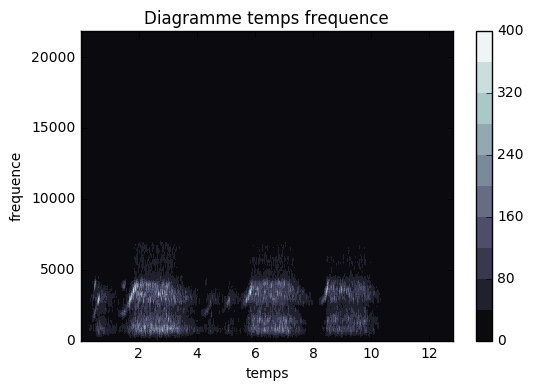

In [83]:
Fe,s=wv.read('perceuse.wav')
N=len(s)

#Paramètres de la transformée de Fourier à fenêtre
p=2**7 #largeur de fenêtre
n=p/2 #recouvrement temporel
T=2.*p/Fe #Largeur temporelle de la fenêtre
F=np.arange(p)/T #Vecteur des fréquences observées
t=[] #vecteur des temps
S=np.zeros(p) #matrice des coefficients de Fourier
w=np.hanning(2*p) #déclaration de la fenêtre: fenetre de Hanning
#w=np.hamming(2*p) #

#Calcul du spectrogramme
for k in np.arange(p+1,N-p+1,n+p):
    t=np.hstack((t,[k/Fe])) #construction du vecteur temps
    xw=w*s[k-p:k+p] #produit de la fenetre avec le signal
    yw=fft.fft(xw)/len(xw) # transformée de Fourier
    S=np.vstack((S,np.abs(yw[:p])))

X,Y=np.meshgrid(t,F)      
Z=S[1:,]


CS=plt.contourf(X,Y,Z.T,10,cmap=plt.cm.bone)
cbar=plt.colorbar(CS)

plt.xlabel('temps')
plt.ylabel('frequence')
plt.title('Diagramme temps frequence')
plt.show()
